0


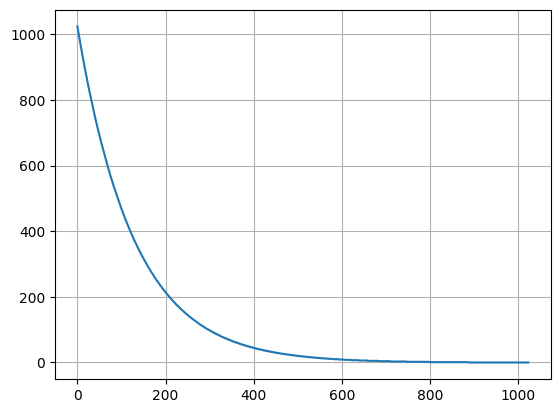

#pragma once
#include <Arduino.h>
const uint16_t decayCurveSize = 1024; 
const uint16_t decayCurve[1024] = {
1024,1016,1008,1000,992,984,977,969,961,954,947,939,932,925,917,910,
903,896,889,882,875,869,862,855,848,842,835,829,822,816,810,803,
797,791,785,779,772,766,760,755,749,743,737,731,726,720,714,709,
703,698,692,687,682,676,671,666,661,655,650,645,640,635,630,625,
621,616,611,606,601,597,592,588,583,578,574,569,565,561,556,552,
548,543,539,535,531,527,523,518,514,510,506,502,499,495,491,487,
483,479,476,472,468,465,461,457,454,450,447,443,440,436,433,430,
426,423,420,416,413,410,407,404,401,397,394,391,388,385,382,379,
376,373,370,367,365,362,359,356,353,351,348,345,342,340,337,335,
332,329,327,324,322,319,317,314,312,309,307,305,302,300,298,295,
293,291,288,286,284,282,279,277,275,273,271,269,267,265,262,260,
258,256,254,252,250,248,247,245,243,241,239,237,235,233,232,230,
228,226,224,223,221,219,218,216,214,212,211,209,208,206,204,203,
201,200,198,196,195,193,192,190,189,187,18

In [11]:
import os
import numpy as np
import pprint
import matplotlib.pyplot as plt
import math

# decay
_maxLevel = 1024
_sustain = 0
_decay = 1024
_curve = 8
data = []
for i in range(_decay):
    _level = int((math.exp(-1 * i * (_curve / _decay)) * (_maxLevel - _sustain)) + _sustain)
    data.append(_level)
print(data[-1])
plt.plot(data)
plt.grid(True)
plt.show()

# 16個ずつ改行するのに変換
c_array = []
for i in range(0, len(data), 16):
    c_array.append(",".join(map(str, data[i:i+16])))


filename = 'decayCurve'
txt = '#pragma once\n'
txt += '#include <Arduino.h>\n'
txt += f'const uint16_t {filename}Size = {_decay}; \n'
txt += f'const uint16_t {filename}[{_decay}] = ' + '{\n'
txt += ',\n'.join(c_array)
txt += '};\n'
# with open(f"{filename}.h", "w") as f:
#     f.write(txt)

print(txt)
